<a id='00'></a>
## ME 6103 - Optimization: Homework Project #4 - Unconstrained Optimization
### By: Justin Mitchell
<img src="20200812JM_002.jpg" width="125"/>

#### Due: 6 November 2020 @ 11:59 PM
This document was created using Jupyter, with Python and Markdown. 

### Table of Contents
This table of contents and document utilize live links for your convenience.
- [Intro](#0)
- [Pattern Search](#1)
- [Random Search](#2)
- [Geometric Simplex](#3)
- [Conclusion](#4)

<a id='0'></a>
## Intro

### Setup Code

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
plt.rcParams['figure.dpi'] = 70
import timeit
import random as rand

### Fenton and Eason’s Function

$$ f(x) = \left[12 + x_1^2 + \frac{1+x_2^2}{x_1^2} + \frac{x_1^2x_2^2+100}{(x_1x_2)^4}\right]\left(\frac{1}{10}\right) $$

In [2]:
def FaE(x1, x2):
    arg1 = x1**2
    arg2 = (1+(x2**2))/(x1**2)
    arg3 = ((x1**2 * x2**2)+100)/((x1*x2)**4)
    y = (12 + arg1 + arg2 + arg3)/10
    return y

### Contour Plot of Fenton and Eason’s Function

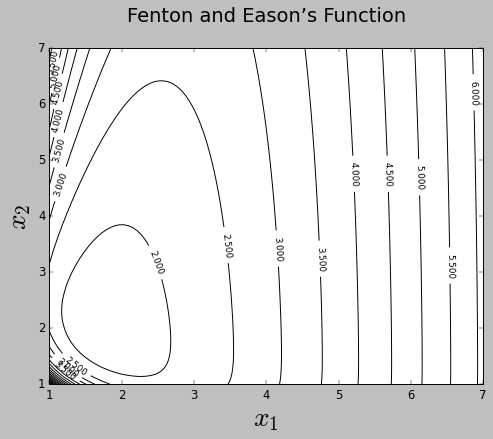

In [3]:
x1 = np.linspace(1, 7, 100) # x1 domain
x1 = x1[x1 != 0] # Remove any zero value to avoid div by zero error
x2 = np.linspace(1, 7, 100) # x2 domain
x2 = x2[x2 != 0] # Remove any zero value to avoid div by zero error
X1, X2 = np.meshgrid(x1, x2) # mesh to make contour plot
Y = FaE(X1, X2) # call Fenton and Eason's Function helper function I defined above
fig, ax = plt.subplots()
# Plot contour plot of Fenton and Eason's Function
CS = ax.contour(X1, X2, Y, 20,
                 colors='k',  # negative contours will be dashed by default
                 )
ax.clabel(CS, fontsize=9, inline=1) # Contour labels
ax.set_xlabel('$x_1$', fontsize=28) 
ax.set_ylabel('$x_2$', fontsize=28) 
ax.set_title('Fenton and Eason’s Function\n', fontsize=20) 
plt.show()

[Back to Table of Contents](#00)

<a id='1'></a>
## Pattern Search (Hook and Jeeves Method)
Source of Code: Me (I wrote it all.)

References: Lecture Notes, Textbook

### Pattern Search Algorithm: Flowchart
<img src="ME_6103_HW4_PatternSearch.shapex.png" width="600"/>

### Pattern Search Algorithm: Code

In [24]:
def PatternSearch(xo, d, threshold):
    # Initializations 
    # xo = [2, 6.5] # Starting point
    optimumNotFound = True # Boolean to track if optimum point has been found yet
    dReductionNeeded = True # Boolean to continue reducing d
#     d = 0.1 # Perturbation amount
    a = 2 # Perturbation amount reduction factor
#     threshold = 0.001 # Threshold minimum d value to stop program
    x1data = [] # Data storage
    x2data = [] # Data storage
    ydata = [] # Data storage
    # Main Program
    start = timeit.default_timer() # Start runtimer
    while optimumNotFound:
        # Exploratory Move
        dReductionNeeded = True
        while dReductionNeeded:
            xoa = np.add(xo,[-1*d, 0]) # Perturb x1 to the left (option a)
            ya = FaE(xoa[0],xoa[1])
            xob = np.add(xo,[d, 0]) # Perturb x1 to the right (option b)
            yb = FaE(xob[0],xob[1])
            xoc = np.add(xo,[0, 0]) # Don't perturb x1 (option c)
            yc = FaE(xoc[0],xoc[1])
            if (yc <= ya) & (yc <= yb): # option c is best
                d = d/a
                if d < threshold :
                    xn = xoc
                    print("Optimum found!")
                    optimumNotFound = False
                    dReductionNeeded = False
            elif (ya <= yb) & (ya <= yc): # option a is best
                xn = xoa
                dReductionNeeded = False
                xn1 = np.add(xn,[0, d]) # Perturb xn upward (option 1)
                y1 = FaE(xn1[0],xn1[1])
                xn2 = np.add(xn,[0, -1*d]) # Perturb xn downward (option 2)
                y2 = FaE(xn2[0],xn2[1])
                xn3 = xn # Don't pertub xn (option 3) 
                y3 = FaE(xn3[0],xn3[1])
                if (y1 <= y2) & (y1 <= y3):
                    xn = xn1
                elif (y2 <= y1) & (y2 <= y3):
                    xn = xn2
                elif (y3 <= y1) & (y3 <= y2):
                    xn = xn3    
            elif (yb <= ya) & (yb <= yc): # option b is best
                xn = xob
                dReductionNeeded = False
                xn1 = np.add(xn,[0, d]) # Perturb xn upward (option 1)
                y1 = FaE(xn1[0],xn1[1])
                xn2 = np.add(xn,[0, -1*d]) # Perturb xn downward (option 2)
                y2 = FaE(xn2[0],xn2[1])
                xn3 = xn # Don't pertub xn (option 3) 
                y3 = FaE(xn3[0],xn3[1])
                if (y1 <= y2) & (y1 <= y3):
                    xn = xn1
                elif (y2 <= y1) & (y2 <= y3):
                    xn = xn2
                elif (y3 <= y1) & (y3 <= y2):
                    xn = xn3    
        x1data = np.append(x1data, xn[0])
        x2data = np.append(x2data, xn[1])
        ydata = np.append(ydata, FaE(xn[0],xn[1]))
    #     print("Exploratory move complete")
        if optimumNotFound:
            # Pattern Move
            continuePatternMoves = True
            while continuePatternMoves:
                u = np.subtract(xn,xo) # Give direction vector
                xnn = np.add(xn,u)
                if FaE(xnn[0],xnn[1]) > FaE(xn[0],xn[1]):
                    continuePatternMoves = False
                elif FaE(xnn[0],xnn[1]) <= FaE(xn[0],xn[1]):
    #                 print("Pattern move sucessful")
                    xo = xn
                    xn = xnn
                    x1data = np.append(x1data, xn[0])
                    x2data = np.append(x2data, xn[1])
                    ydata = np.append(ydata, FaE(xn[0],xn[1]))
        xo = xn
    stop = timeit.default_timer() # Stop runtimer
    print("Program done running.")
    print("Runtime: " + str(round(stop - start,4)) + " seconds") 
    print("Minimum = " + str(round(ydata[len(ydata)-1],3)))
    fig, ax = plt.subplots()
    CS = ax.contour(X1, X2, Y, 20,
                     colors='k',  # negative contours will be dashed by default
                     )
    ax.clabel(CS, fontsize=9, inline=1) # Contour labels
    ax.set_xlabel('$x_1$', fontsize=28) 
    ax.set_ylabel('$x_2$', fontsize=28) 
    ax.plot(x1data, x2data, 'o')
    plt.show()

### Pattern Search Algorithm: Results, Testing/Validation

Optimum found!
Program done running.
Runtime: 0.0027 seconds
Minimum = 1.745


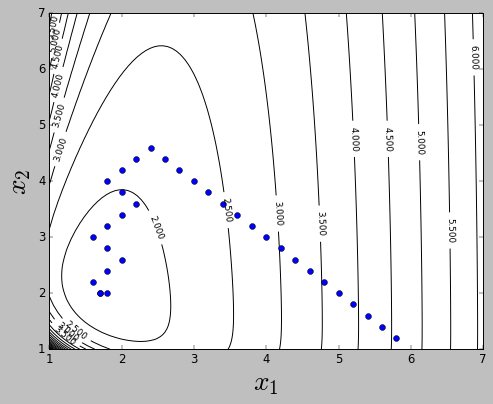

In [5]:
PatternSearch([6, 1], 0.2, 0.1)

The algorithm converged where would we would expect the minimum of the function to be located near, by visual inspection. The pattern steps are obvious - where the interations move in the same direction as previous iterations. The exploratory steps are noticable - where the interations change search direction. The algorithm ran very quickly. 0.0027 seconds is virtually "in the blink of an eye." 

Optimum found!
Program done running.
Runtime: 0.0029 seconds
Minimum = 1.758


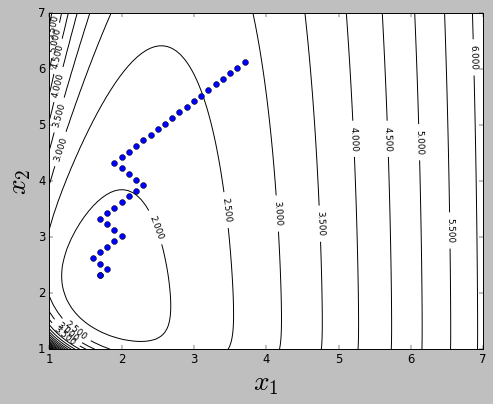

In [6]:
PatternSearch([3.8, 6.23], 0.1, 0.1)

Next, I halved the step size and changed the starting location, wondering what changes I'd see. Again, the algo converged on the minumum in about the same location as previously. Remember, I have my termination threshold set at 0.1, so it's not going to yield the exact same solution. 

Optimum found!
Program done running.
Runtime: 0.0035 seconds
Minimum = 1.744


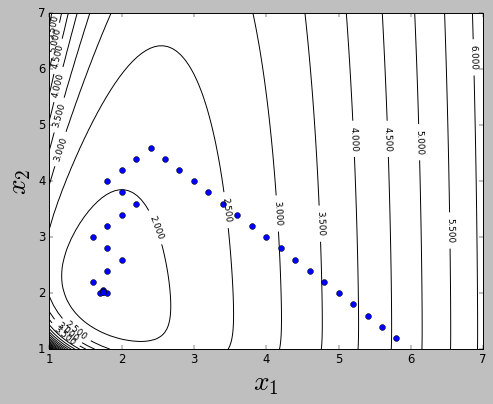

In [7]:
PatternSearch([6, 1], 0.2, 0.001)

Again, I changed the starting location, increased the step size back up, but decreased the termination threshold by a factor of 100. I expect that that will improve the precision among solutions. 

Optimum found!
Program done running.
Runtime: 0.0502 seconds
Minimum = 1.744


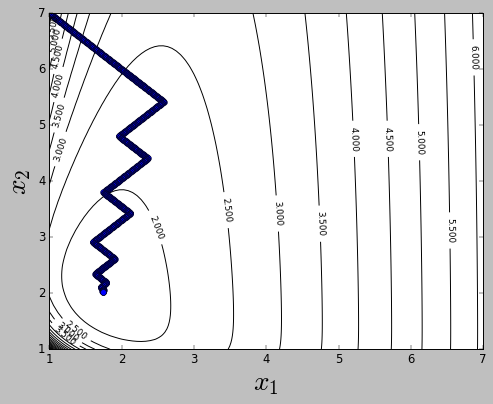

In [10]:
PatternSearch([1, 7], 0.005, 0.0001)

Again, I changed the starting location, but I expect to see a very similar solution because of the significantly decreased termination threshold. The minimum was identical to the previous trial - this really improves my confidence in this algorithm, now. I also made the step sizes tiny, wondering if it would make the algorithm really slow. It didn't. Though, 0.0502 seconds is much longer relative to previous trials. 

Optimum found!
Program done running.
Runtime: 0.0024 seconds
Minimum = 1.755


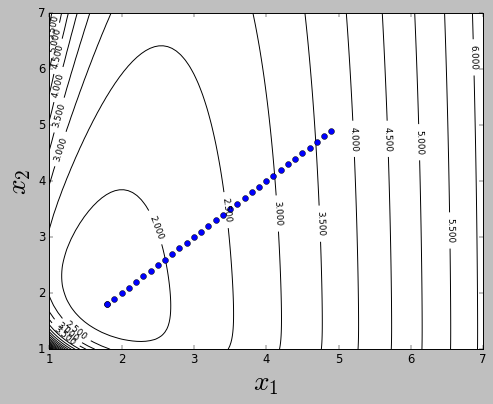

In [9]:
PatternSearch([5, 5], 0.1, 0.01)

One final test. This is a unique run, because this starting position enabled it to converge upon the solution with almost no exploratory steps. 

[Back to Table of Contents](#00)

<a id='2'></a>
## Random Search (Random Walk Method)

Source of Code: Me (I wrote it all.)

References: Lecture Notes, Textbook

### Random Search Algorithm: Flowchart
<img src="ME_6103_HW4_RandomSearch.shapex.png" width="600"/>

In [25]:
import random as rand
# Helper function for generating a random unit direction 
def getRandUnitDir():
    a = rand.uniform(-1,1)
    b = rand.uniform(-1,1)
    unit = [a, b]
    unit = unit/np.sqrt((a**2) + (b**2))
    return unit

### Random Search Algorithm: Code

In [12]:
def RandomSearch(xo, l, e):
#     xo = [6, 6] # Starting point
#     l = 0.1 # Starting step size
    a = 2 # factor to scale step size down by 
#     e = 0.01 # Minimum allowable step size
    N = 100 # Max # of iterations
    optimumNotFound = True # Boolean to track if optimum point has been found yet
    x1data = [] # Data storage
    x2data = [] # Data storage
    ydata = [] # Data storage
    start = timeit.default_timer() # Start runtimer
    while optimumNotFound:
        i = 1
        scaleStepDown = True # Boolean to track when we need to scale the step down
        while scaleStepDown:
            u = getRandUnitDir() # generate random unit direction
            xn = xo + (l*u)
            if FaE(xn[0],xn[1]) < FaE(xo[0],xo[1]): # if it's an improvement
    #             print("Improvement")
                xo = xn
                x1data = np.append(x1data, xn[0])
                x2data = np.append(x2data, xn[1])
                ydata = np.append(ydata, FaE(xn[0],xn[1]))
                scaleStepDown = False
            elif FaE(xn[0],xn[1]) >= FaE(xo[0],xo[1]): # if it's not an improvement
                if i <= N:
                    i = i+1
    #                 print("Looping")
                elif i > N:
                    l = l/a
                    if l < e:
                        optimumNotFound = False
                        print("Optimum found!")
                        x1data = np.append(x1data, xn[0])
                        x2data = np.append(x2data, xn[1])
                        ydata = np.append(ydata, FaE(xn[0],xn[1]))
                        print("Minimum = " + str(round(ydata[len(ydata)-1],3)))
                        scaleStepDown = False
                    elif l >= e:
    #                     print("Scaling down")
                        pass
    stop = timeit.default_timer() # Stop runtimer
    print("Program done running.")
    print("Runtime: " + str(round(stop - start,4)) + " seconds") 
    fig, ax = plt.subplots()
    CS = ax.contour(X1, X2, Y, 20,
                    colors='k',  # negative contours will be dashed by default
                        )
    ax.clabel(CS, fontsize=9, inline=1) # Contour labels
    ax.set_xlabel('$x_1$', fontsize=28) 
    ax.set_ylabel('$x_2$', fontsize=28) 
    ax.plot(x1data, x2data, 'o')
    plt.show()               

### Random Search Algorithm: Results, Testing/Validation

Optimum found!
Minimum = 1.755
Program done running.
Runtime: 0.0066 seconds


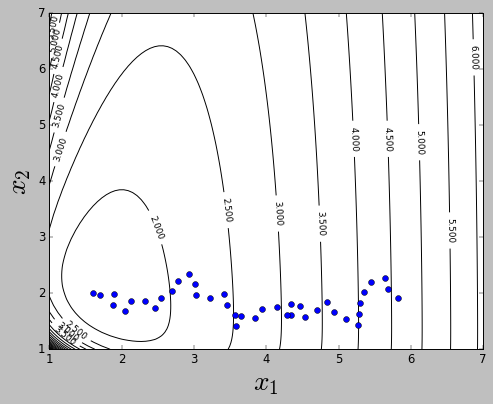

In [13]:
RandomSearch([6, 2], 0.2, 0.1)

The first trial run of the random search algorithm is what we'd expect. The interations randomly meander towards the solution, each one a bit closer than the last. It's only slightly slower than the pattern search algorthim. 

Optimum found!
Minimum = 1.745
Program done running.
Runtime: 0.0067 seconds


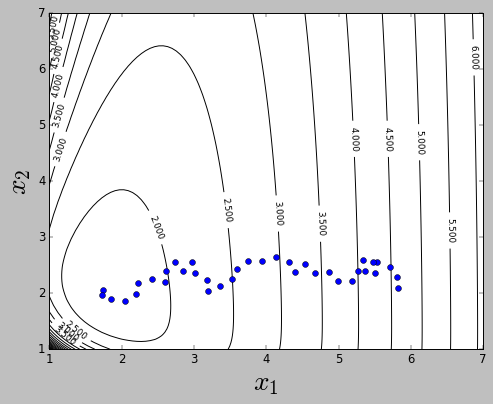

In [14]:
RandomSearch([6, 2], 0.2, 0.1)

If it's random, and not systematic, running the exact same conditions again should yield a different path to the solution, right? Yes! 

Optimum found!
Minimum = 1.748
Program done running.
Runtime: 0.0096 seconds


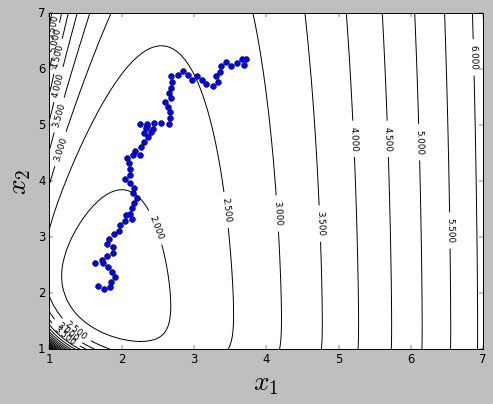

In [15]:
RandomSearch([3.8, 6.23], 0.1, 0.1)

Testing a different starting location and a slightly smaller step size yields a similar solution. This is good!

Optimum found!
Minimum = 1.744
Program done running.
Runtime: 0.0146 seconds


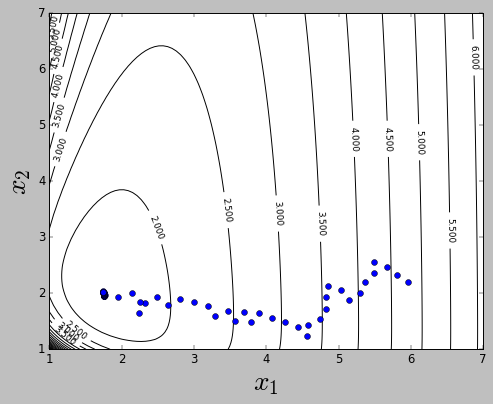

In [16]:
RandomSearch([6, 2], 0.2, 0.001)

Now I decrease the size of the terminaton condition, hoping to see precision from this algo. 

Optimum found!
Minimum = 1.744
Program done running.
Runtime: 0.0166 seconds


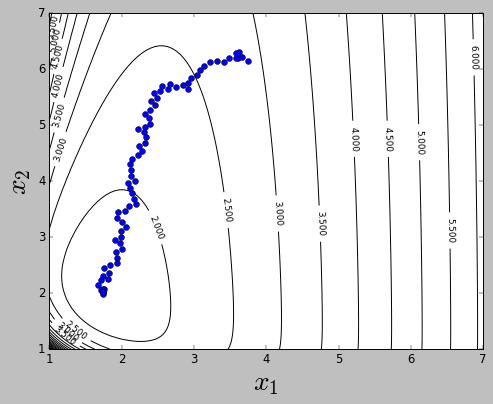

In [17]:
RandomSearch([3.8, 6.23], 0.1, 0.001)

With the decreased termination condition, this random search algorithm repeated the same solution from a different starting point. This precision is confidence inspiring. 

Optimum found!
Minimum = 1.744
Program done running.
Runtime: 0.1434 seconds


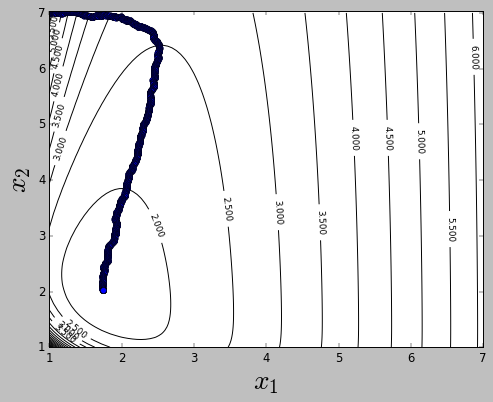

In [19]:
RandomSearch([1, 7], 0.005, 0.0001)

Finally, one last test. I made the step sizes tiny, wondering if it would make the algorithm really slow. It didn't. Though, 0.1434 seconds is much longer relative to previous trials, and slightly longer relative to the pattern search algo. 

[Back to Table of Contents](#00)

<a id='3'></a>
## Geometric Simplex (Nelder–Mead "Downhill Simplex" Method)

Source of Code: Me (I wrote it all.)

References: Lecture Notes, Textbook, [Nelder–Mead method Wikipedia Page](https://en.wikipedia.org/wiki/Nelder–Mead_method)

### Geometric Simplex: Flowchart
<img src="ME_6103_HW4_GeometricSimplex.shapex.png" width="600"/>

### Geometric Simplex: Code

In [26]:
# Helper function for sorting vertices according to their values
def orderThem(x):
#     print(x)
    y = [FaE(x[0,0],x[0,1]), # Evaluate at 1st vertex
         FaE(x[1,0],x[1,1]), # Evaluate at 2nd vertex 
         FaE(x[2,0],x[2,1])] # Evaluate at 3rd vertex 
#     print(y)
    sortIndxs = np.argsort(y) # Returns indices of sorted values
    # Sort values
    ySorted = [y[sortIndxs[0]],
               y[sortIndxs[1]], 
               y[sortIndxs[2]]]
#     print(ySorted)
    # Sort vertices
    xSorted = np.array([x[sortIndxs[0],:],
                        x[sortIndxs[1],:],
                        x[sortIndxs[2],:]])
#     print(xSorted)
    # Calculate centroid of vertices
    centroid = [0, 0]
    centroid[0] = (xSorted[0,0]+xSorted[1,0]+xSorted[2,0])/3
    centroid[1] = (xSorted[0,1]+xSorted[1,1]+xSorted[2,1])/3
    return ySorted, xSorted, centroid   
# Starting points (vertices)
def GeometricSimplex(xo, e) :
#     xo = np.array([[2,2],
#                    [4,4],
#                    [4,2]])
    i = 1 # Iteration counter 
#     e = 0.01 # Stopping condition 
    optimumNotFound = True # Used to terminate while program
    x1data = [] # Data storage
    x2data = [] # Data storage
    c1data = [] # Data storage
    c2data = [] # Data storage
    yo, xo, co = orderThem(xo) # Orders vertices according to their values
    originalx1 = np.array(xo[:,0])
    originalx2 = np.array(xo[:,1])
    originalc = co
    start = timeit.default_timer() # Start runtimer
    while optimumNotFound :
        yo, xo, co = orderThem(xo) # Orders vertices according to their values
        xr = co + (co - xo[2,:]) # Compute reflected point
        yr = FaE(xr[0],xr[1])
        # If the reflected point is better than the second worst, but not better than the best
        # then obtain a new simplex by replacing the worst point with the reflected point
        if yo[0] <= yr < yo[1] : 
            xo = np.array([xo[0,:], xo[1,:], xr])
        # If the reflected point is the best point so far
        # then compute the expanded point
        if yr < yo[0] :
            xe = co + (2*(xr - co))
            ye = FaE(xe[0],xe[1])
            # If the expanded point is better than the reflected point
            # then obtain a new simplex by replacing the worst point with the expanded point
            if ye < yr :
                xo = np.array([xo[0,:], xo[1,:], xe])
            # else obtain a new simplex by replacing the worst point with the reflected point
            else: 
                xo = np.array([xo[0,:], xo[1,:], xr])
        # If the reflected point is worse than the second worst
        # then compute the contracted point
        if yr >= yo[1] :
            xc = co + (0.5*(xo[2] - co))
            yc = FaE(xc[0],xc[1])
            # If the contracted point is better than the worst point
            # then obtain a new simplex by replacing the worst point with the contracted point
            if yc < yo[2] :
                xo = np.array([xo[0,:], xo[1,:], xc])
        # Shrink 
        # Replace all points except the best
        # try without for now - built to handle failures 
        # Test Convergence 
        yn, xn, cn = orderThem(xo)
        Q = ((((yn[0]-yo[0])**2) + ((yn[1]-yo[1])**2) + ((yn[2]-yo[2])**2))/4)**(1/2)
    #     x1data = np.append(x1data, xn[:,0])
    #     x2data = np.append(x2data, xn[:,1])
        c1data = np.append(c1data, cn[0])
        c2data = np.append(c2data, cn[1])
        if Q < e:
            optimumNotFound = False
            print("Program done running.")
            stop = timeit.default_timer() # Stop runtimer
            print("Runtime: " + str(round(stop - start,4)) + " seconds") 
            print('Optimum = ' + str(round(yn[0],3)))
            print('Iterations = ' + str(i))
        i = i+1
    fig, ax = plt.subplots()
    CS = ax.contour(X1, X2, Y, 20,
                    colors='k',  # negative contours will be dashed by default
                    )
    ax.clabel(CS, fontsize=9, inline=1) # Contour labels
    ax.set_xlabel('$x_1$', fontsize=28) 
    ax.set_ylabel('$x_2$', fontsize=28) 
    ax.plot(c1data, c2data, 'o')
    ax.plot(originalx1, originalx2, 'ro')
    ax.plot(originalc[0], originalc[1], 'bo')
    plt.show()

### Geometric Simplex: Results, Testing/Validation

Program done running.
Runtime: 0.0038 seconds
Optimum = 1.744
Iterations = 20


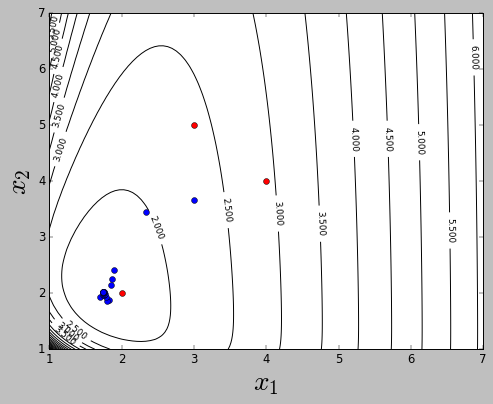

In [27]:
xo = np.array([[2,2],
               [4,4],
               [3,5]])
e = 0.00001
GeometricSimplex(xo, e)

The red points are the initial vertices of the triangle. The blue points are the centroids of the triangles resulting from sucessive iterations. I'm impressed by how few iteration it took for this algo to converge. Also, it appears to be converging in the location where we know the minimum to be, by now. 

Program done running.
Runtime: 0.0042 seconds
Optimum = 1.745
Iterations = 16


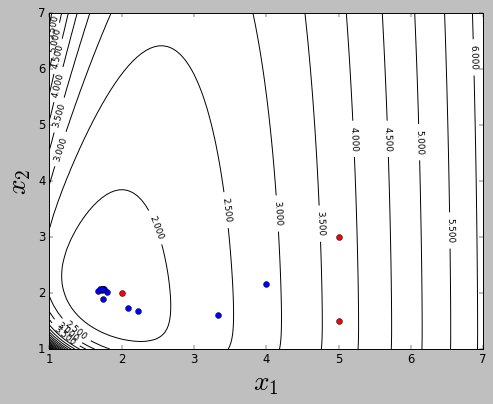

In [28]:
xo = np.array([[2,2],
               [5,1.5],
               [5,3]])
e = 0.00001
GeometricSimplex(xo, e)

Changing the starting triangle didn't seem to cause any issues. Again, it converged on the same solution as before, quickly, and in very few iterations. 

Program done running.
Runtime: 0.0098 seconds
Optimum = 1.858
Iterations = 57


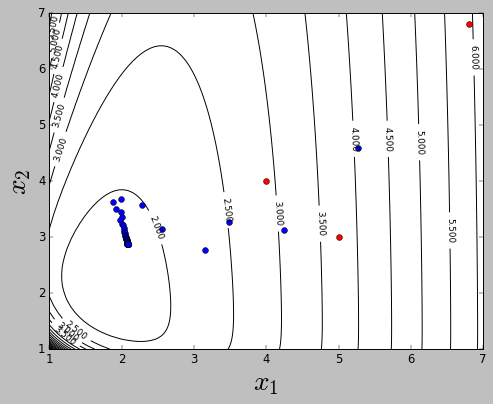

In [29]:
xo = np.array([[5,3],
               [4,4],
               [6.8,6.8]])
e = 0.00001
GeometricSimplex(xo, e)

Though this final test converged quickly, again, it seems to converge towards a slightly different solution. It's in about the same location, so this isn't too concerning, but it is worth noting. 

[Back to Table of Contents](#00)

<a id='4'></a>
## Conclusion: Which wins? and What did I learn?

#### Accuracy
1. Pattern Search
2. Random Search
3. Geometric Simplex

The pattern search and random search algorithms were very similar. I only rank pattern higher, because it's systematic rather than random, so you would expect slightly higher precision. 

#### Efficiency 
1. Geometric Simplex
2. Pattern Search
3. Random Search

The geometric simplex algorithm was the most efficient in terms of least number of iterations, least number of objective function calls, and overall time. The random search algorithm was the worst in those categories. The pattern search algorithm falls in between the two, but was much closer to the random search algorithm in efficiency than the geometric simplex algorithm. The geometric simplex algorithm was the clear winner in efficiency. 

#### Ease of Use/Robustness
1. Random Search
2. Pattern Search
3. Geometric Simplex 

The random search algorithm was extremely easy to impliment, and after programming, required no debugging. The random search algorithm is robust because it works with discontinuous and nondifferentiable objective functions. Random methods work well to find global minimum when an objective function posseses several relative minima. Random methods often suceed when other fail due to local difficulties like sharply varying functions and shallow regions. After programming the pattern search algorithm, I did a small bit of debugging before it was up and running as expected. Though the pattern search algorithm also works with discontinuous and nondifferentiable objective functions, they can become stuck and require special "tricks" to get out of local optimum. Lastly, the geometric simplex alorithm was the most difficult to impliment. It took a long stint of debugging to get running as expected after a long time spent programming it. 

#### My Recommendation: The Random Search Algorithm 

I would recommend the random search algorithm to others. Its highlights are its ease of implementation and robustness. It was virtually as good as the pattern search algorithm in terms of accuracy. Though it is less efficient, it still ran in "the blink of an eye" for this problem. If a problem is too complex for the random search algorithm's less efficient process, I would still recommend it with a large step size for locating global optimum on a broad scale, before doing further optimization. 

#### What I Learned

I enjoyed this homework project, because it gave me more start-to-finish hands-on experience with an optimization problem, and I was forced to see the optimization from different angles. I took it as personal challenge to write all of the code myself, though there exist many Python libraries for this sort of thing. I also took it as personal challenge to continue programming in Python like I did in the 2nd homework, even though I am much more experienced and comfortable in MATLAB. 


[Back to Table of Contents](#00)